Algoritmo Naive Bayes

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [3]:
credit = pd.read_csv('./dados/Credit.csv')
credit.shape

(1000, 21)

In [4]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
previsores = credit.iloc[:,0:20].values
classe = credit.iloc[:,20].values

Vamos tratar os atributos categóricos, transformando-os em numéricos

In [6]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [7]:
# Divisão do Treino e teste.
X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [8]:
naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)

GaussianNB()

In [11]:
# Previsões de teste:
prev = naivebayes.predict(X_test)
prev[:5]

array(['bad', 'good', 'good', 'good', 'bad'], dtype='<U4')

In [12]:
# Matriz de confusão e cálculo da taxa de acerto/erro
conf = confusion_matrix(y_test, prev)
conf

array([[ 41,  45],
       [ 42, 172]])

In [13]:
taxa_acerto = accuracy_score(y_test, prev)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

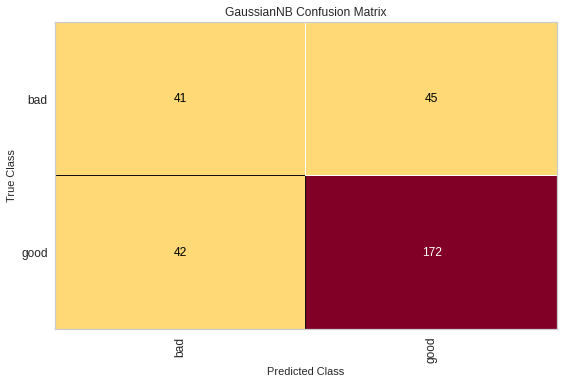

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
# Visualização da Matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_train, y_train)
v.score(X_test, y_test)
v.poof()

Vamos prever agora com o Novo Modelo

In [24]:
new_credit = pd.read_csv('./dados/NovoCredit.csv')
new_credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [25]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente o método "transform", pois a adaptação aos dados (fit) já foi feita anteriormente
new_credit = new_credit.iloc[:,0:20].values
new_credit[:,0] = labelencoder1.transform(new_credit[:,0])
new_credit[:, 2] = labelencoder2.transform(new_credit[:, 2])
new_credit[:, 3] = labelencoder3.transform(new_credit[:, 3])
new_credit[:, 5] = labelencoder4.transform(new_credit[:, 5])
new_credit[:, 6] = labelencoder5.transform(new_credit[:, 6])
new_credit[:, 8] = labelencoder6.transform(new_credit[:, 8])
new_credit[:, 9] = labelencoder7.transform(new_credit[:, 9])
new_credit[:, 11] = labelencoder8.transform(new_credit[:, 11])
new_credit[:, 13] = labelencoder9.transform(new_credit[:, 13])
new_credit[:, 14] = labelencoder10.transform(new_credit[:, 14])
new_credit[:, 16] = labelencoder11.transform(new_credit[:, 16])
new_credit[:, 18] = labelencoder12.transform(new_credit[:, 18])
new_credit[:, 19] = labelencoder13.transform(new_credit[:, 19])

In [26]:
naivebayes.predict(new_credit)

array(['good'], dtype='<U4')